# To connect my kaggle account via my json file

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Download dataset from kaggle via API link

In [ ]:
!kaggle datasets download -d seanangelonathanael/dataset-cybercrime-in-india

  0% 0.00/4.18k [00:00<?, ?B/s]
100% 4.18k/4.18k [00:00<00:00, 10.0MB/s]


# Unzip a dataset

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('dataset-cybercrime-in-india.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

# Import numpy and pandas

In [ ]:
import numpy as np
import pandas as pd

# Create a Panda variable to load the csv file

In [ ]:
df=pd.read_csv("/content/placement.csv")

# To see the dataset

In [ ]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


# To see the shape of the tensor

In [ ]:
df.shape

(100, 4)

In [ ]:
# Steps
## 0. Preproces + EDA + Feature Selection
## 1. Extract input and output cols
## 2. Scale the values
## 3. Train test split
## 4. Train the model
## 5. Evaluate the model/model selection
## 6. Deploy the model

# To see if there is missing values or unwanted column

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


# **PREPROCESSING**

# Column from 1 to onward, deleting column 0

In [ ]:
df = df.iloc[:,1:]

In [ ]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


# **EDA**

# Import graphing or ploting library

In [ ]:
import matplotlib.pyplot as plt

# Ploting the inputs in graph and c for color in the output

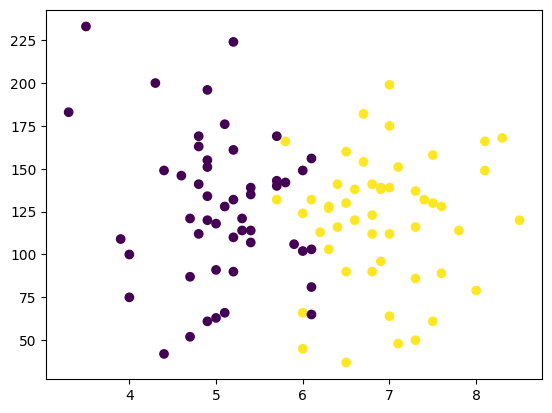

In [ ]:
plt.scatter(df["cgpa"],df["iq"],c=df["placement"])

# Separating input and output, column 0 and 1

In [ ]:
X = df.iloc[:,0:2]
Y = df.iloc[:,-1]

In [ ]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [ ]:
Y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

# Train test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1)

In [ ]:
X_train

,cgpa,iq
23,4.7,87.0
33,6.0,149.0
81,5.4,107.0
37,8.1,149.0
50,3.5,233.0
...,...,...
74,6.7,154.0
6,5.7,143.0
24,4.7,121.0
39,4.6,146.0


# **SCALLING**

# Import scaller

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_train

array([[-1.13899193, -0.99825275],
       [ 0.0068555 ,  0.5900707 ],
       [-0.52199716, -0.48589034],
       [ 1.8578398 ,  0.5900707 ],
       [-2.19669724,  2.74199279],
       [ 0.09499761,  0.76939754],
       [-0.78642349, -1.53623327],
       [ 1.32898714,  0.82063378],
       [ 1.15270292, -1.02387087],
       [-0.25757083,  0.15456266],
       [ 0.80013448, -0.76768967],
       [-0.69828138,  0.15456266],
       [-0.69828138,  2.51142971],
       [-0.96270771,  0.2057989 ],
       [ 0.0068555 , -1.53623327],
       [ 2.03412402,  1.07681498],
       [ 1.32898714,  0.10332642],
       [-0.96270771, -0.15285478],
       [ 0.71199237, -0.35779974],
       [-0.61013927, -0.12723666],
       [-0.78642349,  0.05209018],
       [ 1.76969769, -1.20319771],
       [-0.8745656 , -0.89578027],
       [-1.05084982, -0.35779974],
       [-0.69828138, -0.40903598],
       [ 0.44756605, -0.92139839],
       [-0.96270771,  0.64130694],
       [ 0.71199237, -0.07600042],
       [-0.96270771,

# Already trained so don't need to use fit_transform

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
X_test

array([[ 1.15270292,  0.28265326],
       [-0.8745656 , -1.61308763],
       [ 1.32898714, -1.66432387],
       [ 0.35942394, -0.25532726],
       [-0.25757083,  0.35950762],
       [ 0.0068555 , -0.0503823 ],
       [-0.96270771, -1.66432387],
       [-1.05084982,  0.94872438],
       [-1.40341826, -2.15106815],
       [ 1.59341347, -0.3065635 ]])

# **TRAINING**

# Import ML model "Logistic Regression"

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
mdl = LogisticRegression()

# Train the model

In [ ]:
mdl.fit(X_train,Y_train)

LogisticRegression()

# **EVALUATE**

# Passing new data for testing the accuracy

In [ ]:
Y_pred = mdl.predict(X_test)

In [ ]:
Y_test

61    1
7     0
44    1
13    1
36    0
27    1
73    0
34    0
96    0
55    1
Name: placement, dtype: int64

# Import library for accuracy

In [ ]:
from sklearn.metrics import accuracy_score

# Finding accuracy

In [ ]:
accuracy_score(Y_test, Y_pred)

0.9

# **PLOTING THE DECISSION BOUNDRY**

# Import mlxtend ploting library

In [ ]:
from mlxtend.plotting import plot_decision_regions

# .values to convert and X_train is already a numpy array because of scalling

<Axes: >

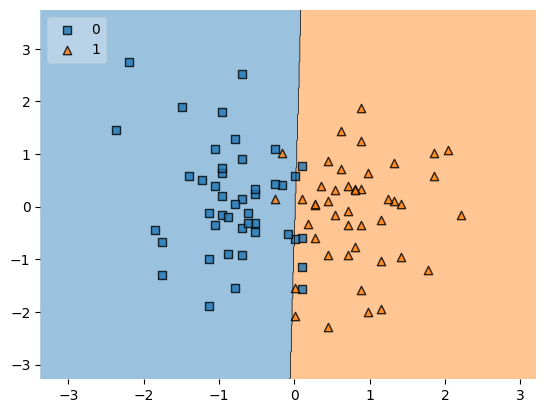

In [ ]:
plot_decision_regions(X_train, Y_train.values, clf=mdl, legend=2)

# **DEPLOY**

# Converting object into file

In [ ]:
import pickle
pickle.dump(mdl, open("test.pkl", "wb"))